<a href="https://colab.research.google.com/github/snegi5/hello-github/blob/master/Module_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve,auc

import keras
from keras.models import Sequential#For building the Neural Network layer by layer
from keras.layers import Dense#To randomly initialize the weights to small numbers close to 0(But not 0)





import warnings
warnings.filterwarnings("ignore")
from google.colab import files



In [4]:
data = pd.read_csv('bank.csv')
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5628,5629,15665168,Calabrese,681,Germany,Female,44,3,105206.70,2,1,1,163558.36,0
489,490,15807709,Kirby,714,Germany,Female,55,9,180075.22,1,1,1,100127.71,0
5376,5377,15602500,Maslova,850,Spain,Male,38,1,146343.98,1,0,1,103902.11,0
2287,2288,15619889,Vasin,556,France,Male,26,4,0.00,1,1,0,195167.38,0
644,645,15698786,Marcelo,819,France,Female,39,9,133102.92,1,1,0,27046.46,1
7390,7391,15764922,Tu,596,Spain,Male,20,3,187294.46,1,1,0,103456.47,0
5199,5200,15726310,Mordvinova,782,Spain,Female,27,3,0.00,2,1,0,143614.01,0
3204,3205,15603942,Hawthorn,547,Germany,Male,50,3,81290.02,3,0,1,177747.03,1
6666,6667,15798709,Gill,588,Spain,Male,32,3,109109.33,1,0,1,4993.94,0
7402,7403,15632010,Chia,647,Spain,Male,33,7,121260.19,2,1,0,77216.48,0


In [47]:
data.shape

(10000, 14)

* There are 10000 observations and 14 coumns in the data set.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* we can see that there are no null values in the data.
* Surname, Geography and Gender are only 3 object(String) datatypes.
* Also, features like Rownumber, CustomerId and Surname are not relevant as these are unique id's and customer last name.

##### Dropping RowNumber, CustomerId and Surname.

In [5]:
# dropping unneccessary columns.
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8202,589,Spain,Female,27,4,0.00,2,1,0,144181.48,0
6073,471,Germany,Female,36,5,90063.74,2,1,1,96366.70,0
7053,755,Germany,Male,43,6,165048.50,3,1,0,16929.41,1
2613,630,France,Male,26,7,129837.72,2,0,1,197001.15,0
6912,544,France,Male,48,10,78314.63,3,1,1,103713.93,1


##EDA

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


* Mean and Median CreditScore are also same aroung 650.
* Age is between the range from 18 to 92.it looks their are outlier in the age.
* Tenure is between 0 to 10, with mean and median close to 5. There are customer in the bank with less than 1 year of tenure.
* 25% of the customer has 0 Balance where as balance for top 25% of the customer is between 127644.2400 and 250898.09.
* 50% of the customer has only 1 product with the bank.
* 25% of the customer does not have a credit card where as other 75% of the customer has only 1 credit card.
* 25% of the customer are not active member, remaining 75% are active member.
* minimum estimayed salry is only 11.58. 50% of the customer earns less than 51002.11.



### Bivariate analysis

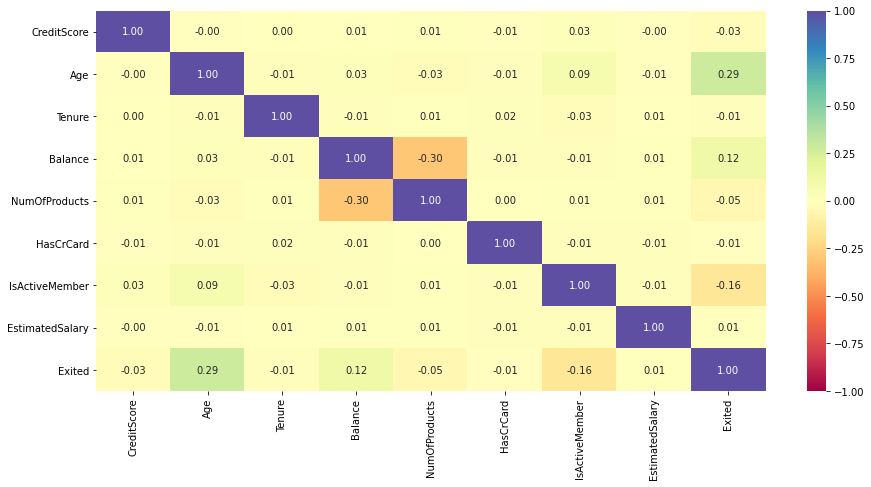

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* There is some week correlation between Exited and Age and between Exited and Balance.
* There is also some week negative correlation between Exited and IsActiveMember and between Balance and Balance and NumberOfProducts.

In [7]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Exited'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of an Exited Customer')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of an Existing Customer')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Exited')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Exited - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

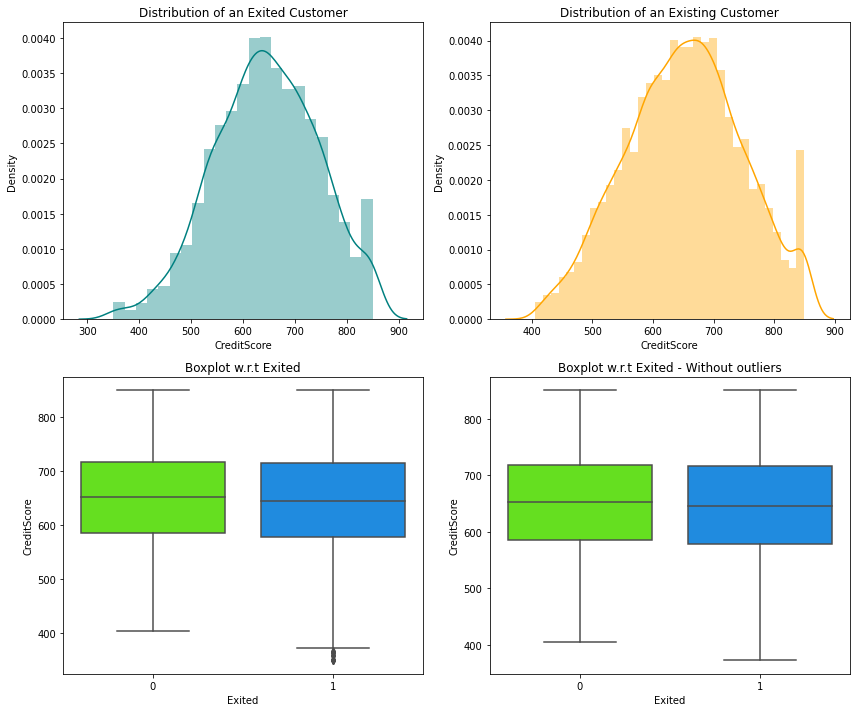

In [29]:
plot('CreditScore')

In [8]:
# one hot encoding for Geography.
data = pd.get_dummies(data, columns=['Geography','Gender'],drop_first=True)
data.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7489,600,26,6,108909.12,1,1,0,82547.01,0,0,0,0
2912,699,32,1,123906.22,3,1,1,127443.82,1,1,0,1


In [9]:
X=data.drop(columns='Exited')
y=data['Exited']

X.shape

(10000, 11)

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
X_train.sample(2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
model = Sequential()

model.add(Dense(units = 16, activation = 'relu', input_dim = 11))

model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))



In [12]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [14]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 2ms/step - loss: 0.4751 - accuracy: 0.7881 - val_loss: 0.4456 - val_accuracy: 0.8031
Epoch 2/10
427/427 [==============================] - 1s 1ms/step - loss: 0.4249 - accuracy: 0.8161 - val_loss: 0.4190 - val_accuracy: 0.8200
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8350 - val_loss: 0.4010 - val_accuracy: 0.8319
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 0.8436 - val_loss: 0.3811 - val_accuracy: 0.8419
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8519 - val_loss: 0.3693 - val_accuracy: 0.8462
Epoch 6/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3519 - accuracy: 0.8552 - val_loss: 0.3627 - val_accuracy: 0.8494
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8572 - val_loss: 0.3589 - val_accuracy: 0.8487
Epoch 

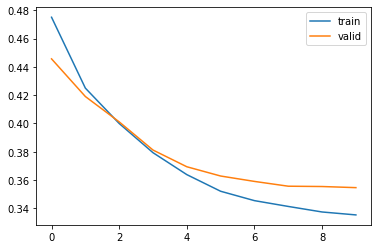

In [15]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [16]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8575


In [17]:
print(score)

[0.34255871176719666, 0.8575000166893005]


In [18]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

NameError: ignored

In [22]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.475060,0.788125,0.445612,0.803125,0
1,0.424908,0.816094,0.418971,0.820000,1
2,0.399899,0.835000,0.401040,0.831875,2
3,0.379233,0.843594,0.381103,0.841875,3
4,0.363712,0.851875,0.369280,0.846250,4
5,0.351946,0.855156,0.362723,0.849375,5
6,0.345305,0.857188,0.358907,0.848750,6
7,0.341199,0.860625,0.355518,0.859375,7
8,0.337283,0.862344,0.355294,0.853125,8
9,0.335204,0.862500,0.354501,0.858125,9


In [27]:
model.predict(X_train)

array([[0.04349512],
       [0.45918626],
       [0.1447626 ],
       ...,
       [0.08731177],
       [0.02651837],
       [0.7787372 ]], dtype=float32)

In [34]:
model.predict(X_train)

(8000, 1)

####Optimal Threshold

In [39]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)




0.26189983


In [46]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [49]:
scores_op = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.80925
Accuracy on test set :  0.7925
Recall on training set :  0.7261029411764706
Recall on test set :  0.7604938271604939
Precision on training set :  0.5234098939929329
Precision on test set :  0.49201277955271566
F1 on training set :  0.6083162217659137
F1 on test set :  0.597478176527643
ROC-AUC Score on training set :  0.7783309932013006
ROC-AUC Score on test set :  0.7805603932040713
